In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/bhuwandhakal/Downloads/corn_data.csv')



In [5]:
df.head()


,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [6]:
df.shape



(422, 22)

In [7]:
(df.isna().sum() / len(df) * 100).sort_values(ascending = False).round(2)

Acreage                 16.82
Education                6.16
County                   0.00
Water source             0.00
Latitude                 0.00
Advisory language        0.00
Advisory format          0.00
Extension provider       0.00
Main advisory source     0.00
Farm records             0.00
Crop insurance           0.00
Main credit source       0.00
Power source             0.00
Farmer                   0.00
Yield                    0.00
Laborers                 0.00
Fertilizer amount        0.00
Crop                     0.00
Household size           0.00
Age bracket              0.00
Gender                   0.00
Longitude                0.00
dtype: float64

In [9]:
df = df.dropna()


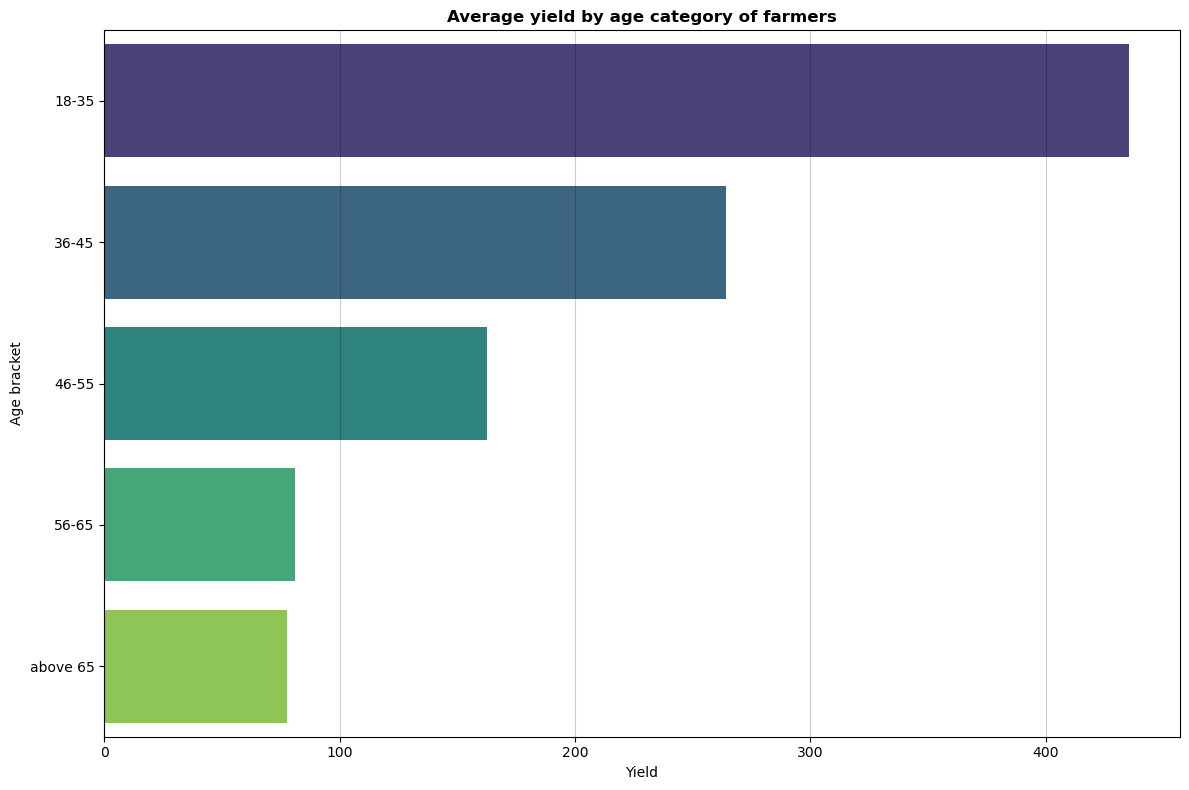

,count
Age bracket,
36-45,104
46-55,81
18-35,76
56-65,51
above 65,16


In [11]:

age_yield = df.groupby('Age bracket')['Yield'].mean()

plt.figure(figsize = (12,8))
sns.barplot(y = age_yield.index, x = age_yield, palette = 'viridis')
plt.title('Average yield by age category of farmers', fontweight = 'bold')

plt.grid (True, axis = 'x', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

display(pd.DataFrame(df['Age bracket'].value_counts()))

/Users/bhuwandhakal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


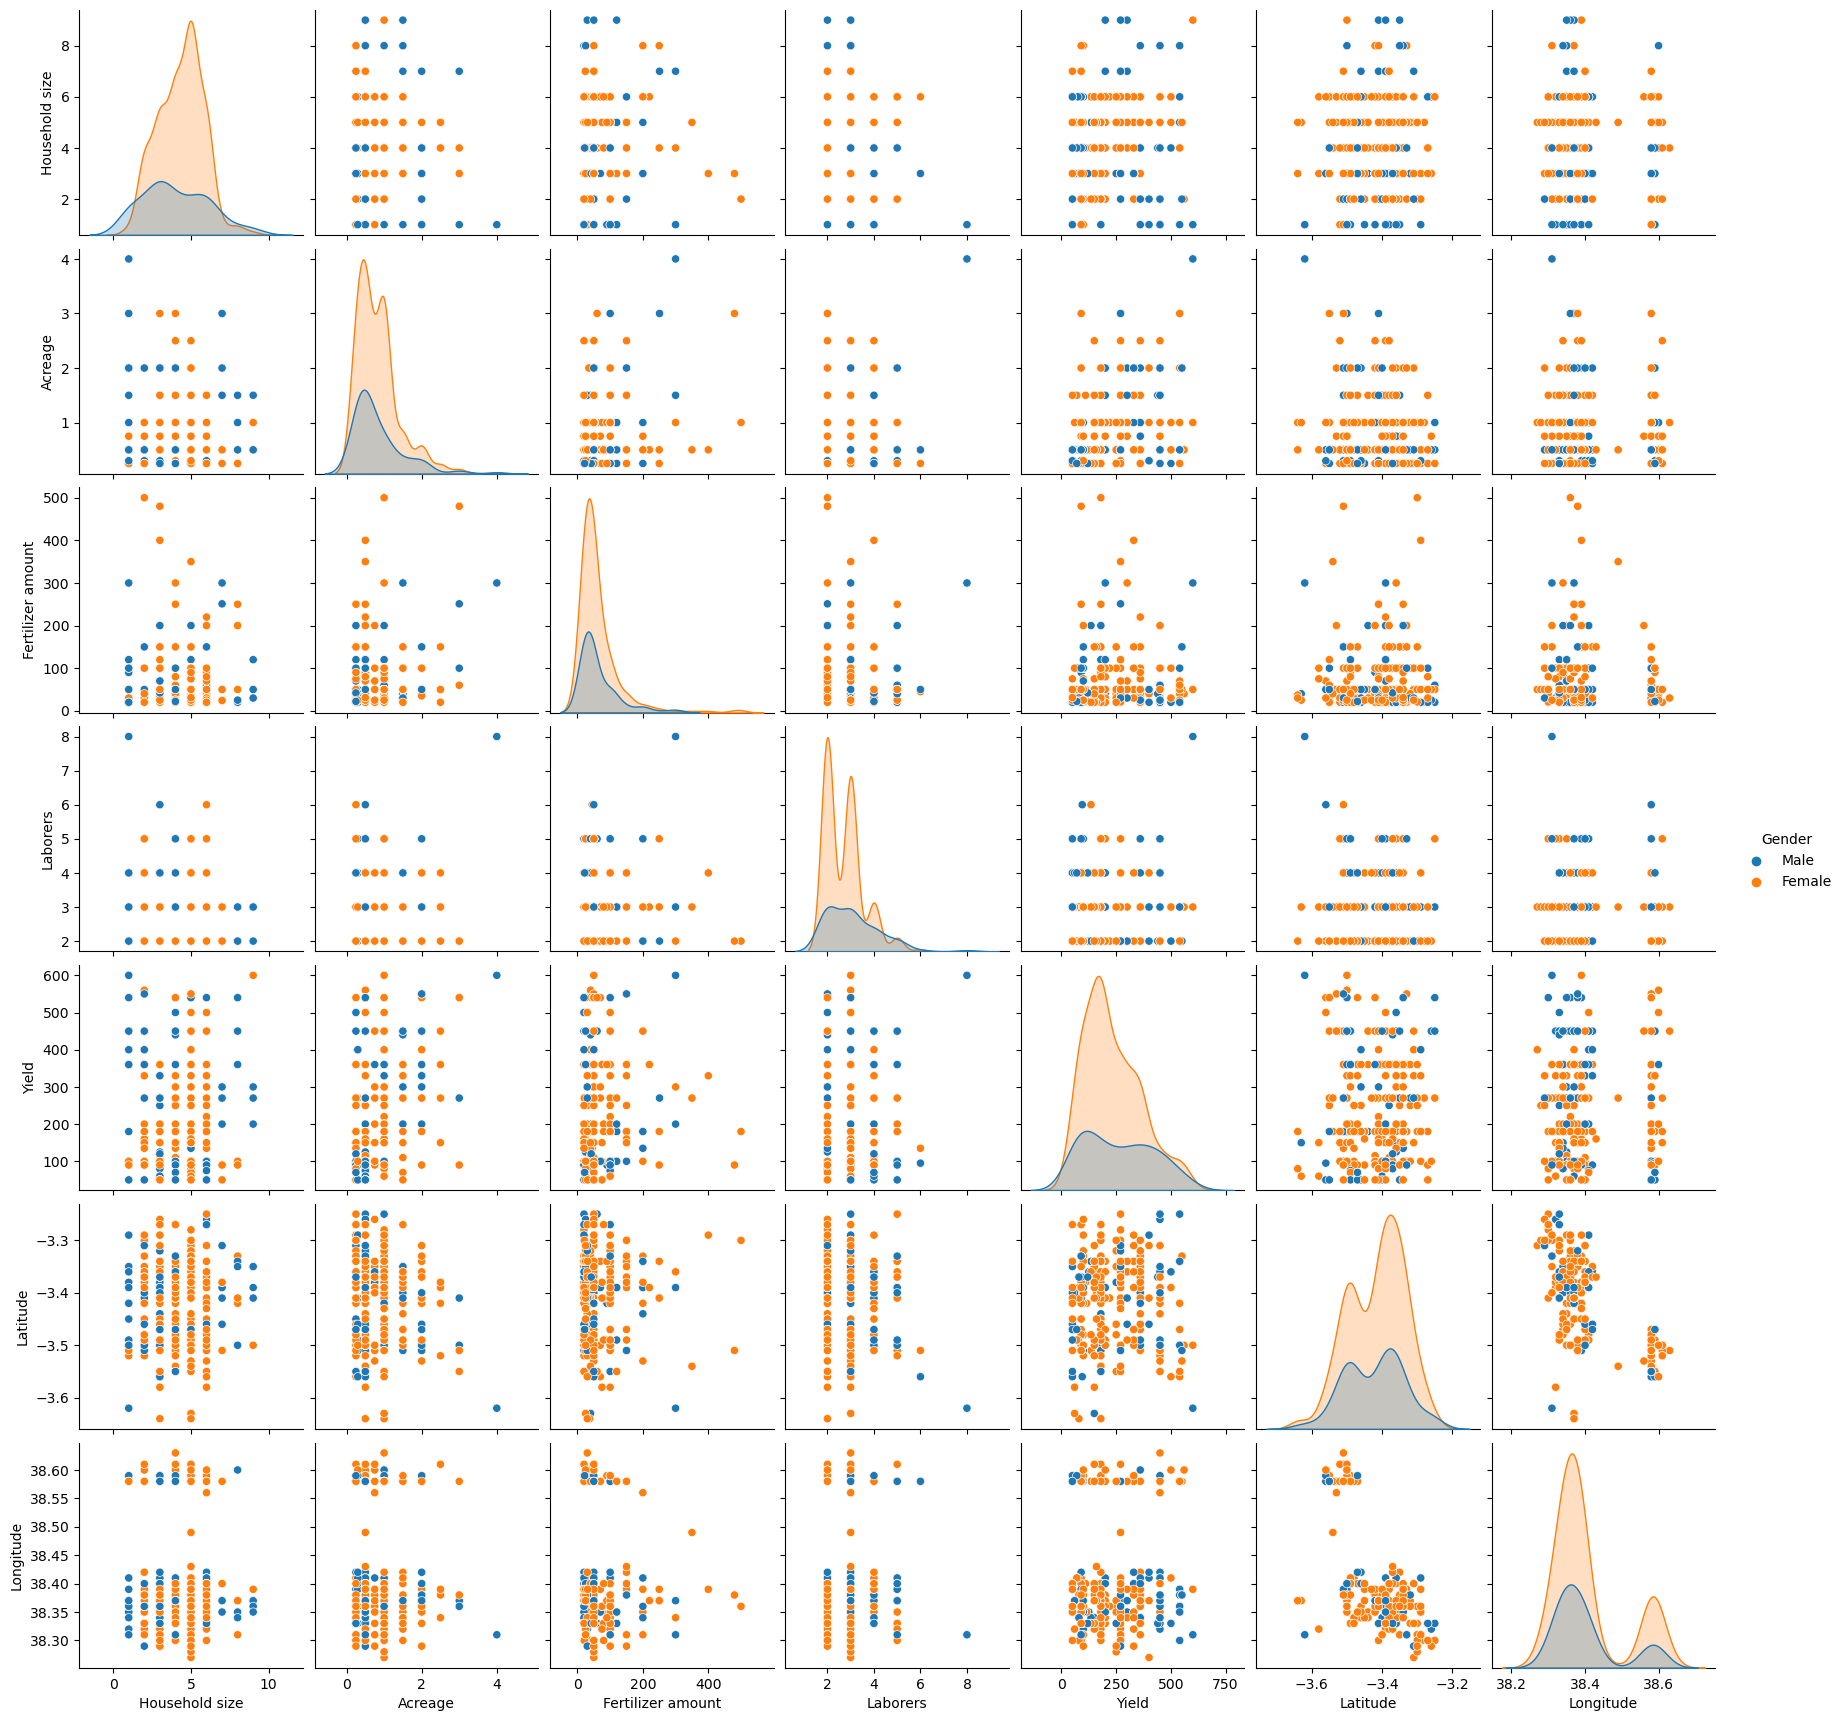

In [13]:
sns.pairplot(df, hue = 'Gender')
plt.show()

In [14]:
df.groupby('Gender')['Yield'].mean()

Gender
Female    232.446352
Male      262.315789
Name: Yield, dtype: float64

In [15]:
pd.DataFrame(df.groupby('Gender')['Age bracket'].value_counts())

count
Gender Age bracket       
Female 36-45           84
       46-55           66
       18-35           42
       56-65           28
       above 65        13
Male   18-35           34
       56-65           23
       36-45           20
       46-55           15
       above 65         3

In [16]:
result = pd.DataFrame(df.groupby(['Gender', 'Age bracket'])['Yield'].mean(), columns=['Yield'])
result

Yield
Gender Age bracket            
Female 18-35        437.380952
       36-45        264.404762
       46-55        155.606061
       56-65         82.142857
       above 65      77.692308
Male   18-35        432.647059
       36-45        262.500000
       46-55        193.333333
       56-65         79.565217
       above 65      76.666667

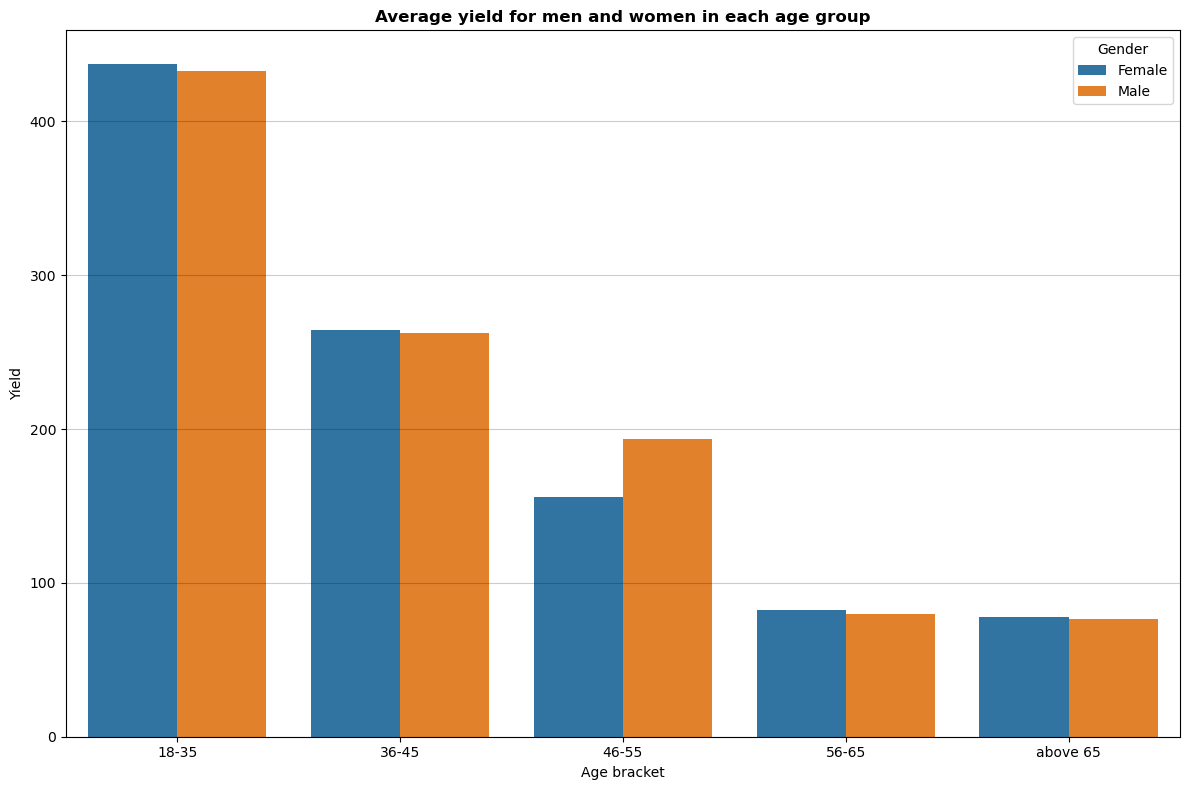

In [17]:
result_reset = result.reset_index()

plt.figure(figsize = (12,8))

sns.barplot(x='Age bracket', y='Yield', hue='Gender', data=result_reset)
plt.title('Average yield for men and women in each age group', fontweight = 'bold')

plt.grid(True, axis = 'y', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

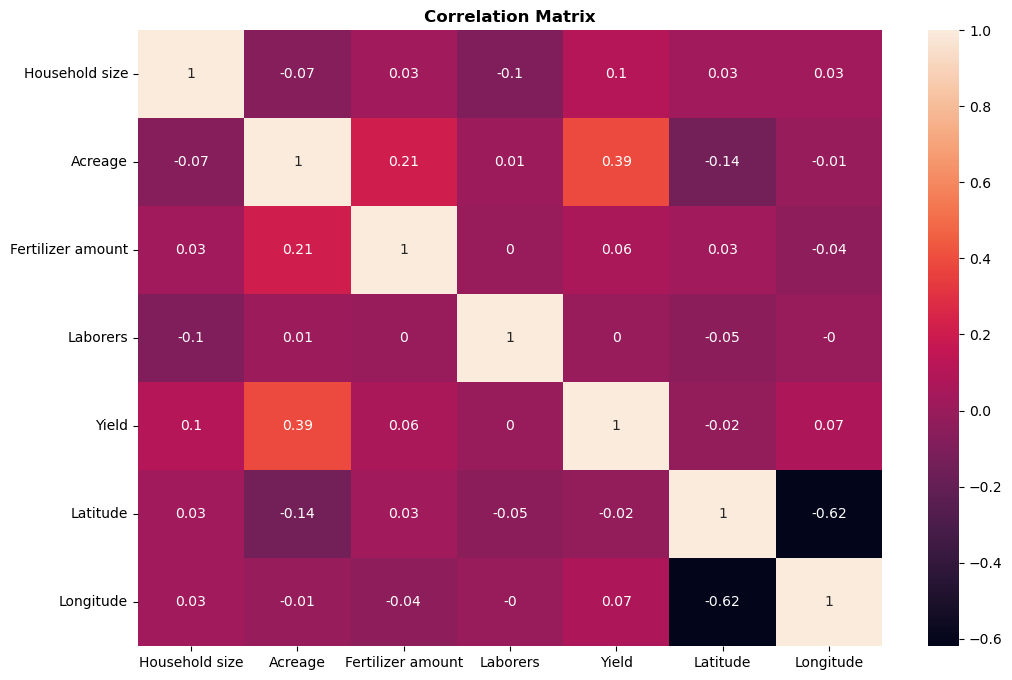

In [18]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(corr.round(2), annot = True)
plt.title('Correlation Matrix', fontweight = 'bold')

plt.show()

In [19]:
(df.describe(include = 'object').nunique() >=1).index

Index(['County', 'Farmer', 'Education', 'Gender', 'Age bracket', 'Crop',
       'Power source', 'Water source', 'Main credit source', 'Crop insurance',
       'Farm records', 'Main advisory source', 'Extension provider',
       'Advisory format', 'Advisory language'],
      dtype='object')

In [20]:
df.describe(include='object')

,County,Farmer,Education,Gender,Age bracket,Crop,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
count,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
unique,1,328,5,2,5,1,1,1,3,1,2,5,4,2,3
top,TAITA TAVETA,fmr_65,Primary,Female,36-45,corn,Manual,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili
freq,328,1,195,233,104,328,328,328,248,328,238,144,189,224,254


In [22]:
 columns_to_encode = ['Education', 'Gender', 'Age bracket', 'Main credit source', 'Farm records', 'Main advisory source', 'Extension provider', 'Advisory format', 'Advisory language']

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_encoded = df.copy()

df_encoded = df_encoded.drop(['County', 'Farmer', 'Crop', 'Power source', 'Water source', 'Crop insurance'], axis = 1)

for column in columns_to_encode:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

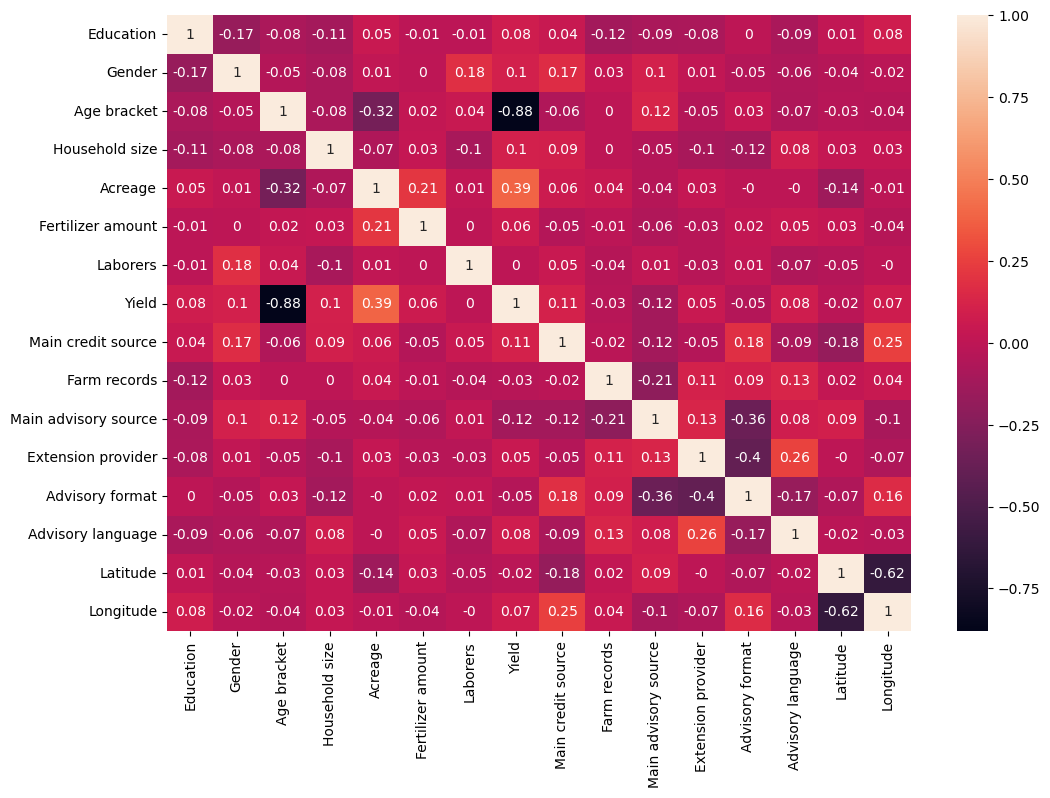

In [24]:
corr_2  =df_encoded.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr_2.round(2), annot = True)

plt.show()


In [25]:
corr_2['Yield'].abs().sort_values(ascending = False).round(2)


Yield                   1.00
Age bracket             0.88
Acreage                 0.39
Main advisory source    0.12
Main credit source      0.11
Household size          0.10
Gender                  0.10
Education               0.08
Advisory language       0.08
Longitude               0.07
Fertilizer amount       0.06
Extension provider      0.05
Advisory format         0.05
Farm records            0.03
Latitude                0.02
Laborers                0.00
Name: Yield, dtype: float64

In [29]:
FEATURES = ['Age bracket', 'Acreage', 'Main advisory source', 'Main credit source', 'Household size', 'Gender']
TARGET = ['Yield']
